In [1]:
!nvidia-smi

Sat Jun  5 15:45:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    77W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, shutil
from glob import glob

In [3]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [4]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# Preprocessing images

In [5]:
image_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_dir = '/content/grive/MyDrive/Face Mask Dataset/Train'
val_dir = '/content/grive/MyDrive/Face Mask Dataset/Validation'
test_dir = '/content/grive/MyDrive/Face Mask Dataset/Test'

In [7]:
batch_size = 80
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='binary')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


# Building CNN Model

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from keras.callbacks import EarlyStopping
result = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    callbacks=[EarlyStopping(patience=16, verbose=1)]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 46s 284ms/step - loss: 1.9977 - accuracy: 0.4686 - val_loss: 0.2851 - val_accuracy: 0.9000
Epoch 2/30
100/100 [==============================] - 27s 274ms/step - loss: 0.2937 - accuracy: 0.8978 - val_loss: 0.2298 - val_accuracy: 0.9013
Epoch 3/30
100/100 [==============================] - 27s 274ms/step - loss: 0.1658 - accuracy: 0.9320 - val_loss: 0.1515 - val_accuracy: 0.9463
Epoch 4/30
100/100 [==============================] - 27s 273ms/step - loss: 0.1014 - accuracy: 0.9683 - val_loss: 0.0778 - val_accuracy: 0.9800
Epoch 5/30
100/100 [==============================] - 27s 270ms/step - loss: 0.0578 - accuracy: 0.9803 - val_loss: 0.0591 - val_accuracy: 0.9837
Epoch 6/30
100/100 [==============================] - 27s 271ms/step - loss: 0.0818 - accuracy: 0.9699 - val_loss: 0.0451 - val_accuracy: 0.9837
Epoch 7/30
100/100 [==============================] - 27s 269ms/step - loss: 0.0417 - accuracy: 0.9842 - val_loss: 0.0331 - val_ac

In [12]:
model.save('binary_model.h5')

# Evaluation on model

In [13]:
result.history['accuracy']

[0.5837500095367432,
 0.9035000205039978,
 0.9397500157356262,
 0.9729999899864197,
 0.9793750047683716,
 0.9701250195503235,
 0.9857500195503235,
 0.984125018119812,
 0.9906250238418579,
 0.9916250109672546,
 0.9921249747276306,
 0.9891250133514404,
 0.9934999942779541,
 0.9951249957084656,
 0.9962499737739563,
 0.9959999918937683,
 0.9958750009536743,
 0.9977499842643738,
 0.9976249933242798,
 0.9973750114440918,
 0.9943749904632568,
 0.9919999837875366,
 0.9955000281333923,
 0.9975000023841858,
 0.9984999895095825,
 0.999625027179718,
 0.9984999895095825,
 0.9927499890327454,
 0.996749997138977,
 0.9988750219345093]

In [24]:
np.mean(result.history['accuracy'])

0.9738916695117951

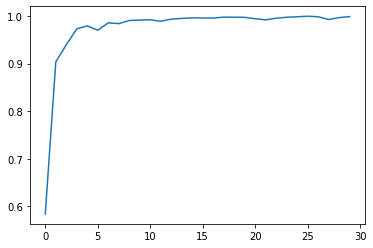

In [14]:
plt.plot(result.history['accuracy'])

In [15]:
model.metrics_names

['loss', 'accuracy']

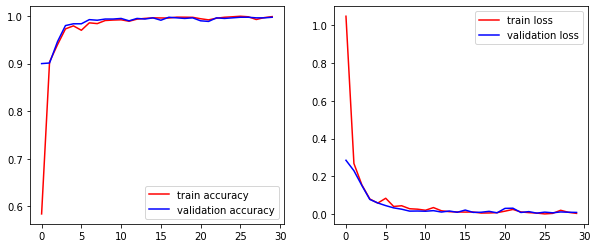

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['loss'], label='train loss', color='red')
plt.plot(result.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.show()